# Convolutional neural network setup



In [1]:
## Start off with the required imports.

from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

#All machine learning imports.
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle



In [2]:
#Data importing
dataset = pd.read_csv("C:\\Users\\20183382\\Desktop\\CNN\\Handwritten Data.csv").astype('float32')

dataset.rename(columns={'0':'label'}, inplace=True)

# The data is as follows:
# First row contains y-labels, with 0:A, 1:B etc. Up to 25.
# Axist 1 stands for collumns, 0 for Index
X = dataset.drop('label' ,axis = 1)
y = dataset['label']

In [3]:
#lets first inspect the data

print('data shape:', X.shape)    #where (rows, collumns)

print('collumns:',len(X.iloc[1]))

X.head()

data shape: (372450, 784)
collumns: 784


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


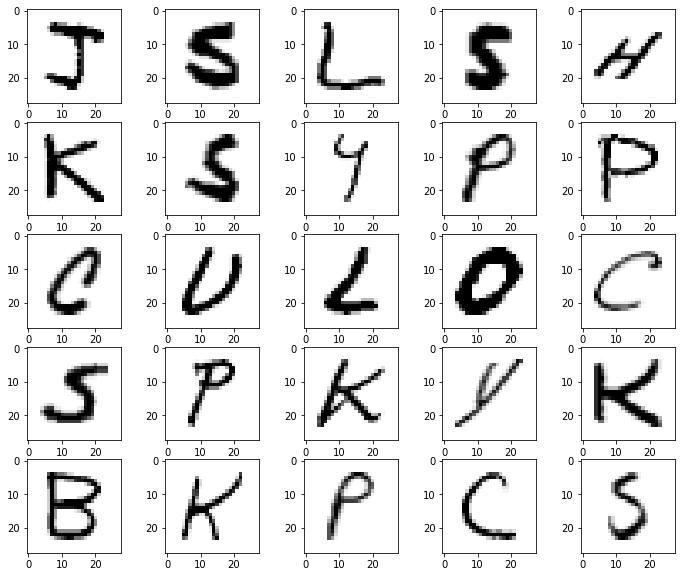

In [4]:
#Inspect the letters

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [16]:
#Random copy to be safe
data_alphabet = dataset.copy()

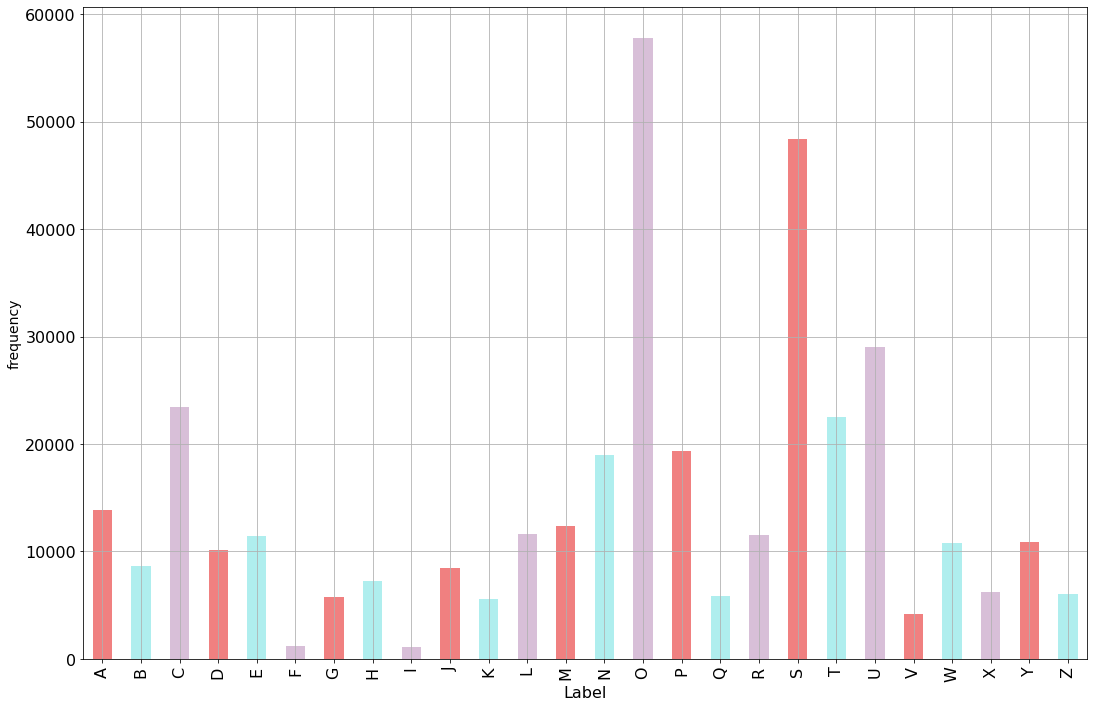

In [15]:
#Building the labels

alphabet_keys = {0:'A',1:'B',2:'C', 3:'D',4:'E',5:'F',6:'G', 7:'H',8:'I',9:'J', 
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
            19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}
visual_data = dataset.copy()
visual_data['label'] = visual_data['label'].map(alphabet_keys)

my_color = ['lightcoral','paleturquoise','thistle']
label_freq = visual_data.groupby('label').size()
label_freq.plot.bar(figsize=(18,12), color= my_color, fontsize=16)
plt.ylabel("frequency", fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.grid()
plt.show()



In [15]:
#check out the labels with high and low values, or atleast get a table with size
print(label_freq)

label
A    13869
B     8668
C    23409
D    10134
E    11440
F     1163
G     5762
H     7218
I     1120
J     8493
K     5603
L    11586
M    12336
N    19010
O    57825
P    19341
Q     5812
R    11566
S    48419
T    22495
U    29008
V     4182
W    10784
X     6272
Y    10859
Z     6076
dtype: int64


In [17]:
# splitting the data, into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data to 0 and 1. 
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)



X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [18]:
#clearly see that the value are between 0,1
print(X_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
#This looks good according the the input shape.
print(X_train.shape)
print(y_train.shape)

(279337, 784)
(279337,)


In [ ]:
#Making the training set smaller
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)


In [ ]:
#Creating the SVM model
#1ST model SVM linear kernel
from sklearn.svm import SVC
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

y_predictions = linear_svm_model.predict(X_test)



In [ ]:
#Displaying the results
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_predictions), "\n")


In [ ]:
#Creating a rbg kernel SVM model
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

y_predictions = rbf_model.fit(X_train, y_train)


In [ ]:
#Polynomial model,

In [25]:
# print("Data after scaler")
# X_shuffle = shuffle(X_train)

# plt.figure(figsize = (12,10))
# row, colums = 4, 4
# for i in range(16):  
#     plt.subplot(colums, row, i+1)
#     plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
# plt.show()
#Looks much more fitted to the screen.

In [19]:
#Reshaping the data to the required input shape of the CCN, 28 X 28 X 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [23]:
print(X_train) #Looks about right




[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [ ]:
cnn = models.Sequential()
cnn.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(len(y.unique()), activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cnn.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 89s - loss: 0.2396 - accuracy: 0.9332 - val_loss: 0.0921 - val_accuracy: 0.9743 - 89s/epoch - 64ms/step
Epoch 2/18
1397/1397 - 81s - loss: 0.0906 - accuracy: 0.9742 - val_loss: 0.0638 - val_accuracy: 0.9825 - 81s/epoch - 58ms/step
Epoch 3/18
1397/1397 - 77s - loss: 0.0672 - accuracy: 0.9810 - val_loss: 0.0560 - val_accuracy: 0.9842 - 77s/epoch - 55ms/step
Epoch 4/18
1397/1397 - 82s - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.0509 - val_accuracy: 0.9860 - 82s/epoch - 59ms/step
Epoch 5/18
1397/1397 - 79s - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0434 - val_accuracy: 0.9879 - 79s/epoch - 57ms/step
Epoch 6/18


In [ ]:
cnn = models.Sequential()
cnn.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(len(y.unique()), activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cnn.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

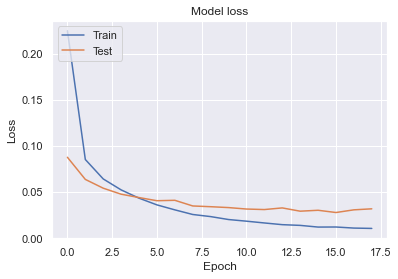

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
cm=confusion_matrix(y_test.argmax(axis=1),cnn.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

NameError: name 'y_test' is not defined

In [ ]:
#Saving the model and extracting it
!pip install --upgrade pip


cnn.save('cnn_model.h5')

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [ ]:
#Start of the neural network model.
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))